# 01. Kigali Road Network Extraction
**Objective**: Extract a clean, drivable road network for the Kigali simulation area.

**Expected Outcome**: A validated SUMO `.net.xml` file and a filtered OpenStreetMap graph.

In [1]:
import sys
import os
from pathlib import Path

# Path Management
root_path = Path(os.getcwd()).parent
if str(root_path) not in sys.path:
    sys.path.append(str(root_path))

# Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import osmnx as ox

# Quality of Life
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Task 2: Testing the Centralized Logger.

In [2]:
from src.utils.logger import setup_logger

# Initialize logger
logger = setup_logger("extraction_step")

# Test log
logger.info("Logger initialized successfully in notebook 01.")

2026-02-23 17:31:03 | INFO | extraction_step | Logger initialized successfully in notebook 01.


### Task 3: Verifying Debug Helpers

In [3]:
from src.utils.debug_helpers import inspect_dict, inspect_array
import numpy as np

# Test 1: Dictionary
test_meta = {"step": "extraction", "bounds": [1.9, 30.0], "complete": False}
inspect_dict(test_meta, title="Extraction Metadata")

# Test 2: Array
test_data = np.random.rand(100, 2)
inspect_array(test_data, name="Coordinate Sample")


--- Extraction Metadata ---
{
    "step": "extraction",
    "bounds": [
        1.9,
        30.0
    ],
    "complete": false
}
---------------------------


--- Coordinate Sample Inspection ---
Shape: (100, 2)
Dtype: float64
Min:   0.0061
Max:   0.9964
Mean:  0.5001
-----------------------------



### Task 4: Verifying Visualization Helpers

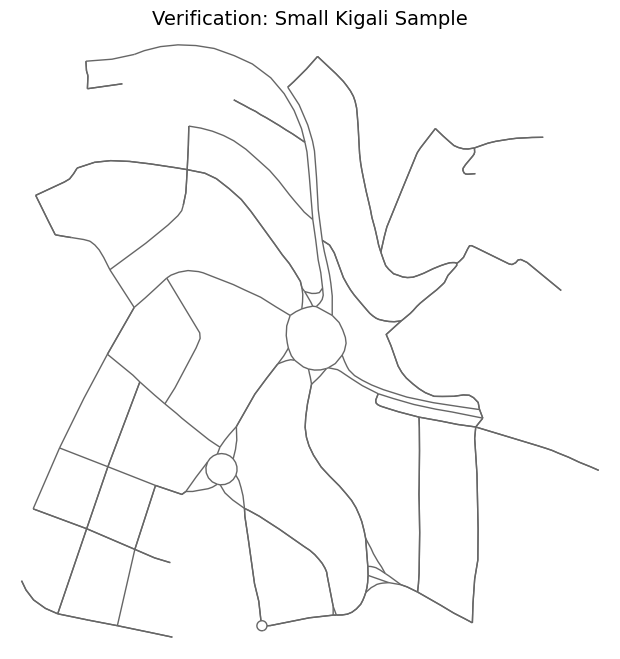

In [4]:
from src.viz.map_plots import plot_road_network
import osmnx as ox

# Create a tiny toy graph of a small point in Kigali for testing
# (Place de l'Indépendance area)
test_point = (-1.9441, 30.0619) 
G_test = ox.graph_from_point(test_point, dist=500, network_type="drive")

# Use our new helper
fig, ax = plot_road_network(G_test, title="Verification: Small Kigali Sample")
plt.show()

### Task 5: Testing the Run Manager.

In [5]:
from src.utils.run_manager import RunManager

# Initialize a test run
rm = RunManager(category="test", tag="verification")

# Create a dummy config
dummy_config = {"bounds": "kigali_center", "version": 1.0}
rm.save_config(dummy_config)

print(f"Run Directory Created: {rm.run_dir}")

Config saved to runs/test/20260223_173103_verification/config.yaml
Run Directory Created: runs/test/20260223_173103_verification


### Task 6: Verifying Load-or-Build Logic.

In [8]:
from src.utils.cache_utils import load_or_build
import pandas as pd

# Define a "dummy" build function
def mock_data_builder(n_rows):
    return pd.DataFrame({"id": range(n_rows), "val": np.random.rand(n_rows)})

test_cache_path = Path("../data/processed/test_cache.parquet")

# Run 1: Should be a Cache Miss
print("--- Run 1 ---")
data1 = load_or_build(test_cache_path, mock_data_builder, n_rows=5)

# Run 2: Should be a Cache Hit
print("\n--- Run 2 ---")
data2 = load_or_build(test_cache_path, mock_data_builder, n_rows=5)

--- Run 1 ---
2026-02-23 17:31:53 | INFO | cache_manager | Cache Miss: Building artifact at ../data/processed/test_cache.parquet
2026-02-23 17:31:53 | INFO | cache_manager | Artifact saved to ../data/processed/test_cache.parquet

--- Run 2 ---
2026-02-23 17:31:53 | INFO | cache_manager | Cache Hit: Loading existing artifact from ../data/processed/test_cache.parquet
